# Logic and Model-Based Reasoning

In [1]:
from utils import *
from logic import *
from copy  import *
from classes import *
import matplotlib.pyplot as plt
from IPython.display import clear_output
from collections import Iterable

/Users/chriscourtin/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  import sys


A critical attribute of a well-design complex system is the ability for it to detect, diagnose, and recover from off-nominal conditions, such as component failures or unexpected sensor readings.  In many situations (deep space probes, autonomous undersea vehicles) there is no potential for human intervention to help diagnose or reconfigure the system; that process must be able to happen automatically.  This notebook describes the elements of model-based reasoning, which is one powerful way for systems to reason about, and correct for, any failures that occur.  The basic idea is that the system compares observations of it's behavior to a model which predicts what the behavior should be, given the current state of the system.  If there is a discrepancy, logical inference is used to determine the most likely causes.  This note book describes the fundamental rules of logical inference, the process by which logical reasoning takes place, and the mechanics of how the system checks for conflicts and determines likely failures. 

## **Propositional Logic**

Propositional logic is a formal language that is used to represent information, in order to reason about the truth and implications of various statements.  The basic element of this language is a **proposition**, which is a simple true or false statement, or equivalently an assignment to one of the domain variables that make up the system being modeled. Logical **sentences** are created by combining propositions using various boolean operators.  The three fundamental boolean operators are **and**, **or**, and **not**. The truth table for these operations is shown below. 

| A | B | A **and** B | A **or** B | **not** A |
|:-:|:-:|:-------:|:------:|:-----:|
| T | T | T | T      | F     |
| T | F | F | T      | F     |
| F | T | F | T      | T     |
| F | F | F | F      | T     |

There are other boolean operators that are commonly used, but all can be reduced to some combination of the three fundamental operators.  Some of the more useful are **implies**, **iff**, and **xor**. 

The **implies** operation means that if A is true B must be true, but if A is false B may be true or false.  **iff**, or "if and only if", means that if A is true B must be true, and vice versa.  **xor** means that either A or B, but not both, must be true. The truth tables for these operations are shown below.  

| A | B | A **implies** B | A **iff** B | A **xor** B |
|:-:|:-:|:-------:|:------:|:-----:|
| T | T |    T    |    T   |   F   |
| T | F |    F    |    F   |   T   |
| F | T |    T    |    F   |   T   |
| F | F |    T    |    T   |   F   |

***Note on syntax:***

The symbols that will be used to represent each operator are shown in the table below. 

| Operator | Markdown | Code | 
|:-:|:-:|:-------:|
| **and** | $\wedge$ |&|
| **or** | $\vee$ |$|$|
|**not** | $\neg$|~|
|**implies** |$\rightarrow$|==>, >>|
|**iff** | $\iff$ |    <=>    |

The **interpretation** of a logical sentence is an assignment to all of the variables that make up that sentence.  If, for a given interpretation, the sentence is true than that interpretation is said to be a **model** of the sentence.  A sentence is **satisfiable** if *at least one* model of the sentence exists.  A sentence is **valid** if *any* interpretation is a model. A sentence *s* is **entailed** by a knowledge base KB (a combination of sentences already known to be true) iff it is true for all models KB (i.e. a model of KB is also a valid model of a).

To check for satisfiability of a logical sentence, it is useful to reduce it to **Conjunctive Normal Form (CNF)**.  CNF consists of **literals** - propositions or their negations - and **clauses**, which are literals combined by "or".  A sentence is CNF is a set of clauses combined by "and".  CNF is useful because it allows rapid algorithmic checking for satisfiability or entailment.  This can be done using **resolution**, which combines clauses into a more compact for by eliminating any complementary literals (such as $A$ and $\neg A$).

**Resolution:** $\frac{(A\vee B)\wedge(\neg A\vee C)}{(A\vee C}$

For example, resolution can be used to show whether a set of clauses in CNF is entailed by some knowledge base KB.  All known elements of the knowledge base are substituted into the clausal expression, and then resolution is repeatedly applied until there are no clauses left (in which case the original set of clauses is entailed by the KB), or until no more resolution steps can be applied (in which case the original set of clauses is not entailed by the KB)

To reduce a given sentence to CNF there are several useful identities or rules of propositional logic. 

**Implies and IFF**

$(A \rightarrow B) => (\neg A) \vee (B)$

$(A \iff B) => (A \rightarrow B)\wedge(B \rightarrow A)$

**De Morgan’s Theorem**

$\neg(A \wedge B) => (\neg A) \vee (\neg B)$

$\neg(A \vee B) => (\neg A) \wedge (\neg B)$

**Distribution**

$A \vee (B\wedge C) => (A\vee B) \wedge (A \vee C)$

$A \wedge (B\vee C) => (A\wedge B) \vee (A \wedge C)$

**Association**

$A \vee (B\vee C) => (A \vee B)\vee C$

$A \wedge (B\wedge C) => (A\wedge B) \wedge C$

**Commutation**

$A \vee B => B\vee A$

$A \wedge B => B\wedge A$

### Code Snippet 0: Practice reducing sentences to CNF
The cell below will reduce logical sentences to CNF using the function to_cnf(s).  This is useful to check practice problems.  

The input should be in the form of a logical sentence s = "((A&B)|C)&(D==>E)".  Use parentheses to denote order of operations.  The flag SHOW controls how much of the process is displayed. 

SHOW = False: Output is only final answer. This is the default.

SHOW = True: Output shows each step in the reduction process

This function uses the logic.py library distributed with the AIMA textbook, updated to be compatible with Python 3.x
Source: http://aima.cs.berkeley.edu/


In [2]:
SHOW = True
s = "my_logical_sentence"
to_cnf(s, SHOW)

Initial Expression:
my_logical_sentence


my_logical_sentence

#### Examples 

In [3]:
#Remove implication
s = "A==>B"
to_cnf(s)

(B | ~A)

In [4]:
#Remove iff
s = "A<=>B"
to_cnf(s)

((A | ~B) & (B | ~A))

In [5]:
#Distribution
s = "(A&B)|(C&D)"
to_cnf(s)

((C | A) & (D | A) & (C | B) & (D | B))

In [6]:
s = "(A<=>B)&(B==>C)"
to_cnf(s, True)

Initial Expression:
((A <=> B) & (B >> C))
Eliminate Implications:
(((A | ~B) & (B | ~A)) & (C | ~B))
Distribution
((A | ~B) & (B | ~A) & (C | ~B))


((A | ~B) & (B | ~A) & (C | ~B))

In [7]:
s = "(A<=>B)|~(D&C)"
to_cnf(s, True)

Initial Expression:
((A <=> B) | ~(D & C))
Eliminate Implications:
(((A | ~B) & (B | ~A)) | ~(D & C))
De Morgan's Theorem:
(((A | ~B) & (B | ~A)) | (~D | ~C))
Distribution
((A | ~B | ~D | ~C) & (B | ~A | ~D | ~C))


((A | ~B | ~D | ~C) & (B | ~A | ~D | ~C))

In [8]:
#HW 9 Problems - [For test should probably delete for submission]
#B.1
SHOW_STEPS = True
s = "~((~A&B)|(C&D))"
to_cnf(s, SHOW_STEPS)
#B.2
s = "A<=>A"
to_cnf(s, SHOW_STEPS)
#B.3
s = "(A<=>B)|C"
to_cnf(s, SHOW_STEPS)
SHOW_STEPS = True
s = "~((~A&B)|(C&D))"
to_cnf(s, SHOW_STEPS)

Initial Expression:
~((~A & B) | (C & D))
De Morgan's Theorem:
((A | ~B) & (~C | ~D))
Initial Expression:
(A <=> A)
Eliminate Implications:
((A | ~A) & (A | ~A))
Initial Expression:
((A <=> B) | C)
Eliminate Implications:
(((A | ~B) & (B | ~A)) | C)
Distribution
((A | ~B | C) & (B | ~A | C))
Initial Expression:
~((~A & B) | (C & D))
De Morgan's Theorem:
((A | ~B) & (~C | ~D))


((A | ~B) & (~C | ~D))

## **Propositional Satisfiability**

One common type of problem in propositional logic are propositional satisfiability problems; finding the set of propositions P that satisfy a sentence $\Phi$.  One of the most common ways of solving these problems is a search algorithm (DPLL) which combines backtrack search with **unit propagation**.

### Code Snippet 1: Unit Propagation
Unit propagation is the repeated application of the rule that, if all literals in a clause are false except L, then L must be true.  For a large set of clauses, that can be used repeatedly to solve for multiple variables. 

Given A = T, B = F, and the clause $(\neg A \vee B \vee C)$, unit propagation implies that the literal C must be true since the literals $\neg A$ and $B$ are both false. 

A demonstration of unit propagation starts with a logical sentence s.

In [9]:
s = "~((~A&B)|(~C&D)|C|B)"

The first step is to reduce the sentence to a set of clauses in CNF. 

In [10]:
clauses = conjuncts(to_cnf(s))
print(clauses)

[(A | ~B), (C | ~D), ~C, ~B]


To find a valid model of the sentence, all clauses must be true.  We want the unit propagation algorithm to return all the literals of the systems it can prove are true or false according to the sentence.  This may or may not be a full assignment across all literals.  It should also return a new sentence that compactly represents the remaining clauses - the set of clauses which cannot be reduced further by the algorithm.   

In [11]:
# Returns reduced clauses, a set of propositions that are true, support for those propositions, and the original set of clauses
# If ~X must be True, then X=False, and ~X shows up in the set of true 
def unit_propagation(s, show = False):
    clauses = check_input(s)
    org_clauses = copy(clauses)
    if show: 
        print("Initial sentance in CNF form:")
        for i, c in enumerate(clauses):
            print("Clause %i:%s"%(i, c))
    
    repeat = True  # this unit propagation function repeats until no changes 
    false_exp = []  # List of literals known to be false
    true_exp = []  # List of literals known to be true (for convenience)
    support = []
    while repeat:  # Repeat the unit propagation steps until the clauses can't be reduced further
        repeat = False
        for i, c in enumerate(clauses):  # For each clause in the sentence
            if len(c.args) <= 1 and len(clauses) > 0:  # if the clause contains a single literal/the list isn't empty
                cc = copy(c)  # Create a copy of that literal
                if cc not in true_exp:  # Check that the literal hasn't already been saved
                    if show: print("We know %s to be true via clause %s"%(cc, i))
                    true_exp.append(cc)  # Add that literal to the list of true literals
                    support.append(i)
                    false_exp.append(to_cnf(~cc)) #Add the negation of that literal to the list of false literals
                    repeat = True  # Repeat the entire loop; since a new literal has been proven we may be able to 
                                   # propagate more
                
        for e in true_exp:  # For every literal we know to be true...
            if e in clauses: clauses.remove(e)  # Remove that literal from clauses where it appears. 
            
        for c in clauses:  # For each clause in the sentence 
            for fe in false_exp:  # For each literal we know to be false
                if fe in copy(c.args):  # If that literal is in the clause 
                    if c.op != "~":  #(Syntatic check)
                        c.args.remove(fe)  # Remove that literal from the clause
        clauses = trim_or(clauses)  # Clean up syntax
    return clauses, true_exp, support, org_clauses

s = "(A1 ==> (X1 <=>(P1&V1)))&P1&~V1&A1"
out = unit_propagation(s, True)

Initial sentance in CNF form:
Clause 0:(X1 | ~P1 | ~V1 | ~A1)
Clause 1:(P1 | ~X1 | ~A1)
Clause 2:(V1 | ~X1 | ~A1)
Clause 3:P1
Clause 4:~V1
Clause 5:A1
We know P1 to be true via clause 3
We know ~V1 to be true via clause 4
We know A1 to be true via clause 5
We know ~X1 to be true via clause 2


### Code Snippet 2: DPLL 

The DPLL algorithm works as follows:

First, an initial unit propagation.

Then, repeatedly: 
1. Assign value to unassigned proposition
2. Unit propagate 
3. Backtrack whenever clause is violated
4. If complete assignment, satisfiable. 


Unit propagation assigns values to propositions that need to equal a certain value in order for the clause to satisfy. Here's an example:

In [12]:
formula = AND.from_string_to_cnf("( X & ( Y | Z ) )") 
formula.unit_propagate().print()

( ( X = True ) & ( Y | Z ) )


Notice how there is an unassigned clause but that unit propagation cannot proceed. The next step is to arbitrarily assign one of the variables, keeping the record as a support, and proceed to see whether we have a model.

In [13]:
def assign_next(formula):
    for or_clause in formula:
        for literal in or_clause:
            if literal.assignment is None:
                literal.assign(False)
                return formula

formula = AND.from_string_to_cnf("(Y | Z) & (Z | X)")
formula.literals_by_name["Y"].assign(True)
formula.unit_propagate().print()

print("here you can see unit propagation has no where to continue...")
print("Instead we perform a DPLL step.")

assign_next(formula).print()

formula.unit_propagate().print()
print("And unit propagation can finish the job!")

( ( Y = True | Z ) & ( Z | X ) )
here you can see unit propagation has no where to continue...
Instead we perform a DPLL step.
( ( Y = True | Z = False ) & ( Z = False | X ) )
( ( Y = True | Z = False ) & ( Z = False | X = True ) )
And unit propagation can finish the job!


On the other hand, see what happens when you need to backtrack!

In [14]:
formula = AND.from_string_to_cnf(" X & (Y | Z) & (Y | ~Z)") 
formula.unit_propagate().print()
print("X is equal to True by unit propagation...")
assign_next(formula).print()
print("Y is assigned False by guess... but watch what happens")
formula.unit_propagate().print()
print("Unit propagation doesn't know any better, it's just been driven into a corner!")

( ( X = True ) & ( Y | Z ) & ( Y | ~Z ) )
X is equal to True by unit propagation...
( ( X = True ) & ( Y = False | Z ) & ( Y = False | ~Z ) )
Y is assigned False by guess... but watch what happens
( ( X = True ) & ( Y = False | Z = False ) & ( Y = False | ~Z = True ) )
Unit propagation doesn't know any better, it's just been driven into a corner!


We should have guessed **True** for Y! We need a way to back up and guess again!

In [15]:
class DPLL:
    def __init__(self, formula):
        self._formula = copy(formula)
        self._formula.unit_propagate()
        self._literal_assigned = None

    def assign_next(self):
        for literal in AND.get_literals(self._formula):
            if literal.assignment is None:
                self._literal_assigned = literal
                literal.assign(False)
                return

    # returns False if already on second assignment
    def try_other_assignment(self):
        if self._literal_assigned.assignment is False:
            self._literal_assigned.assign(True)
            return True
        elif self._literal_assigned is True:
            return False

    def solve(self, print_nicely=False):
        if print_nicely: print("Hi! I'm a new DPLL working on: " + str(self._formula))

        if self._formula.is_satisfied:
            if print_nicely: print("We've found a solution! It was a pleasure to serve you.")
            return self._formula
        elif self._formula.is_complete:
            if print_nicely: print("Drats, this isn't a solution. Good luck!")
            return None

        self.assign_next()
        if print_nicely: print("I'm trying assignment: " + str(self._literal_assigned))
        sub_solve = DPLL(self._formula).solve(print_nicely)
        if sub_solve is None:
            self.try_other_assignment()
            if print_nicely: print("Woops! That didn't work. I'm instead trying: " + str(self._literal_assigned))
            sub_solve = DPLL(self._formula).solve(print_nicely)
        if sub_solve is None:
            if print_nicely: print("Shux, no more assignments possible, see ya later!")
            return None

        return sub_solve
    
    
formula = AND.from_string_to_cnf(" X & (Y | Z) & (Y | ~Z)")
DPLL(formula).solve(print_nicely=True).print()

Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y | Z ) & ( Y | ~Z ) )
I'm trying assignment: Y = False
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = False | Z = False ) & ( Y = False | ~Z = True ) )
Drats, this isn't a solution. Good luck!
Woops! That didn't work. I'm instead trying: Y = True
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = True | Z ) & ( Y = True | ~Z ) )
I'm trying assignment: Z = False
Hi! I'm a new DPLL working on: ( ( X = True ) & ( Y = True | Z = False ) & ( Y = True | ~Z = True ) )
We've found a solution! It was a pleasure to serve you.
( ( X = True ) & ( Y = True | Z = False ) & ( Y = True | ~Z = True ) )


In this DPLL implementation we run equivalently to depth first search, and find the first solution (when there is one!). DPLL's goal is to show satisfiability. 

Above you can see DPLL trying a different assignment when its first guess didn't work. In accordance with the algorithm, DPLL calls unit_propagate before and after each search. 

## Boolean Spaceship Example

The rest of the notebook will be based on the boolean spaceship example, shown diagrammatically below.  

![title](overview_d.jpeg)

This spaceship consists of some propellant tanks, valves, batteries, two thrusters, and a thrust sensor(it's a very narcissistic spaceship).  

P1 and P2 correspond to the propellant tanks (P1 = 1, propellant is flowing. P1 = 0, propellant is off). 

A1, A2, A4, and A5 are valves, controlled by V1-V4.  

A3 and A6 are the thrusters, which produce thrust if X1 and X2 or X3 and X4 have propellant in them (X1 = 1).  

A7 is the thrust sensor, which senses thrust if Y3 and (T1 or T2) is present.  

S1 is the sensor output. 

B1 and B2 are the controls to turn the batteries on and off (B1 = 0) is battery off.  

C1 and C2 are the battery components, which are logical pass-thru gates.  If C1 is working, B1 = Y1. 

R1 is an XOR gate which represents a power conditioning system; it gives power to the sensor if Y1 or Y2 is true, but not of both are true. 

Components which are Unknown are shown in red; components which are Good are shown in blue.


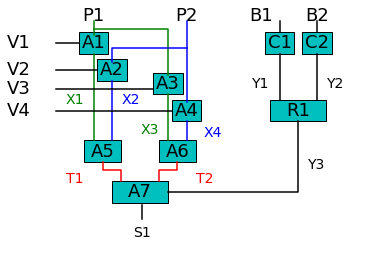

In [16]:
s = Spaceship() #The Spaceship class is a handy container for holding all the variables and helper functions. 
                #Some of the code described here for clarity is also implemented in this class. 
s.plot_spaceship()

The spaceship is represented by three sets of logical statements.  The first is shown below, and it maps the component variables A1-7, R1, and C1 and C2 to the correct functioning of their components.  These statements map how, if a component is functioning correctly, it should behave.

In [17]:
system = []
system.append("A1 ==> (X1 <=>(P1&V1))") #A1 working implies X1 iff (P1 and V1)
system.append("A2 ==> (X2 <=>(P2&V2))")
system.append("A3 ==> (X3 <=>(V3&P1))")
system.append("A4 ==> (X4 <=>(V4&P2))")
system.append("A5 ==> (T1 <=>(X1&X2))")
system.append("A6 ==> (T2 <=>(X3&X4))")
system.append("A7 ==> (S1 <=>((T1&Y3)|(T2&Y3)))") #A7 working implies S1 iff (T1 and Y3) or (T2 and Y3)
system.append("R1 ==> (Y3 <=>((Y1|~Y2)|(~Y2|Y1)))") #R1 working implies Y3 iff (Y1 xor Y2)
system.append("C1 ==> (Y1 <=>B1)") #C1 working implies Y1 iff B1
system.append("C2 ==> (Y2 <=>B2)")

print("\n".join(system))
s.system = system

A1 ==> (X1 <=>(P1&V1))
A2 ==> (X2 <=>(P2&V2))
A3 ==> (X3 <=>(V3&P1))
A4 ==> (X4 <=>(V4&P2))
A5 ==> (T1 <=>(X1&X2))
A6 ==> (T2 <=>(X3&X4))
A7 ==> (S1 <=>((T1&Y3)|(T2&Y3)))
R1 ==> (Y3 <=>((Y1|~Y2)|(~Y2|Y1)))
C1 ==> (Y1 <=>B1)
C2 ==> (Y2 <=>B2)


The next set of statements represents the components in the system.  True/False assignments to these variables correspond to the Good/Unknown states of each component.  If all components are functioning, we can use unit propagation to express our system as more compact set of clauses linking the inputs to the outputs.  Without any inputs, we still can't make any inferences about the hidden or final states of the system. However, it is easy for the DPLL algorithm to find a state that satisfies the system (although it isn't a very interesting one).

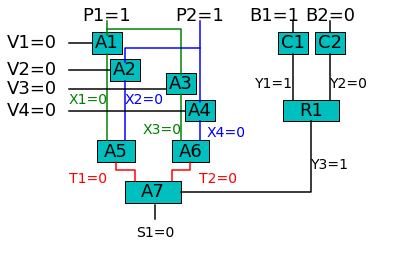

In [18]:
from utils import *
from classes import *
s.all_working() #All components functioning

#To make a component non-functional, use the following method:
s.change_component("A1", False)

s.change_component("A1", True) #makes it functional again

#Formate the description of the system
sp = to_cnf(make_sentence(system)+"&"+s.make_sentence(s.components))
formula = AND.from_string_to_cnf(sp)

#Use DPLL to find a valid mode assignment
true_exp = DPLL(formula).solve(print_nicely=False).true_exp

s.update_states(true_exp) #Update the state of the spaceship to reflect what we know to be true
s.plot_spaceship()


We can see the DPLL algorithm arbitrarily made the choice to close all the valves, which is logically consistent but not that interesting. Finally, we can assign more interesting states to the inputs of the system. With all inputs fully assigned, we can use unit propagation/DPLL to determine the final state of the system S1.  

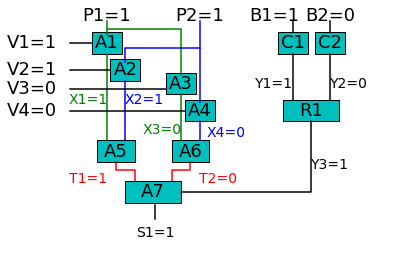

In [19]:
#Propellant on
s.change_input("P1", True)
s.change_input("P2", True)

#Battery 1 on
s.change_input("B1", True)

#Battery 2 off
s.change_input("B2", False)

#Valve 1 and 2 open
s.change_input("V1", True)
s.change_input("V2", True)

#Valve 2 and 3 closed
s.change_input("V3", False)
s.change_input("V4", False)

sp = to_cnf(make_sentence(system) + "&" + s.make_sentence(s.components) + "&" + s.make_sentence(s.inputs))
formula = AND.from_string_to_cnf(sp)
true_exp = DPLL(formula).solve(print_nicely=False).true_exp
s.update_states(true_exp)
s.plot_spaceship()

## Consistency-Based Diagnosis
But what if we observe something that is not consistent with our current model? For example, suppose we don't observe any thrust on the thrust sensor (S1 = False or ~S1), even though our current model implies that it should be there (S1 = True, or S1). We would like to reason about what are the most likely failed components in our system.

The **mode** of a system is an assignment to all the mode, or component, variables of a system.  Each mode variable X represents the functioning of a component, and can be assigned either Good or Unknown.  In our spaceship example, the variables A1-A7, R1, and C1-C2 are the mode variables.  An assignment of True indicates a working component, and 0 indicates a component in the unknown state.In consistency-based diagnosis, there are no assumptions that need be made about how a component fails. 

To determine which components may or may not be functioning, we look for **conflicts**, which are when observations of the inputs and outputs of the system don't match what would logically follow from the current mode assignment of the system. A conflict is a mode assignment to all the component variables of the system (A1-A7, C1-C2, R1), assigning them to either the good (1) or unknown (0) state. 

- **Symptom**: The discrepancy between the value you expect and the value you find.
- **Conflict**: The set of components that are involved in a symptom. Generally found using heuristics.  This is a mode assignment to the system component variables known to be in conflict with the observations of the system. 
- **Diagnoses**: The inverse of a conflict (sometime colloquially used interchangeably with conflicts).  This is a mode assignment to the system that, for the same set of inputs as a conflict, removes the logical inconsistency with the observations. For example, if components A1-A3 being good (A1-A3=1) are inconsistent with some observations, then A1-A3=0 is a valid diagnosis if removing the constraints associated with those components eliminates the inconsistency with the observations. 
- **Kernel diagnoses**: If you have multiple diagnoses, you can find all minimal combinations of conflicting components that explain your data. They're helpful because the act as a (good!) heuristic for determining resolutions. 
- **Resolution**: A claim that "these are the components that have failed in your system." **May or may not be accurate!** 
Usually you'll want to iterate through your resolutions in probability order, given a prior probability of component failure.
- **Component**: Well, you know, the parts the circuit is made of.
- **Mode**: The status of an individual component, as in "Mode Identification"
- **Model**: The truth values assigned to the propositions in a logic sentence evaluating to True.


### Code Snippet 3: Conflict Checking

The conflict checking algorithm takes a set of inputs to the spaceship, and an observation of the system, and determines if the two are logically consistent. This is done using the unit propagation/DPLL algorithm and logical inference methods described above. If the observations violate any clauses shown to be true using those methods, then the mode assignment is a conflict.  For this example, the current state of the spaceship is shown below.

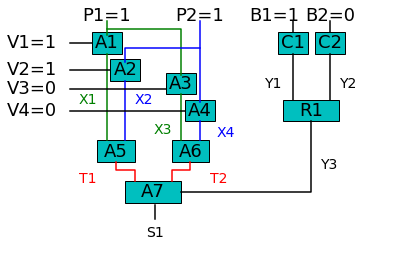

In [20]:
s = Spaceship()
s.all_working() #Sets 
s.change_input("P1", True)
s.change_input("P2", True)
s.change_input("V1", True)
s.change_input("V2", True)
s.change_input("V3", False)
s.change_input("V4", False)
s.change_input("B1", True)
s.change_input("B2", False)
s.plot_spaceship()

For this state of the system, suppose we don't observe any thrust (S1 = 0).  Is this in conflict with our model? Let's find out...

In [21]:
observations = "~S1"  # Suppose we don't observe any thrust on our thrust sensor
inputs = s.make_sentence(s.inputs)
s.all_working()
components = s.make_sentence(s.components)

# Returns true if a set of inputs, component assignments, and observations is a conflict for a given system
def check_conflicts(inputs, components, observations, system):    
    s = make_sentence(system) + "&" + components + "&" + inputs  # formatting everything in CNF
    formula = AND.from_string_to_cnf(to_cnf(to_cnf(s)))
    true_statements = DPLL(formula).solve(print_nicely=False).true_exp
    obs = conjuncts(to_cnf(observations))  # conjuncts splits into clauses

    for o in obs:  # For each observation we have
        not_obs = (to_cnf(~o))  # Look at the negation of that observation
        if str(not_obs) in true_statements:  # If our model shows that to be true...
            return True  # conflict
        
    return False  # no conflict

conflicts = check_conflicts(inputs, components, observations, system)
print("Checking to see if we can find a model, we have determined the presence of conflicts is... " + str(conflicts))

Checking to see if we can find a model, we have determined the presence of conflicts is... True


The code below let's you test different spaceship states for conflicts. For example, type "A1,A2,A3,A7,C1,R1" into the box to check the case above.  The inputs and observations can be changed as well.

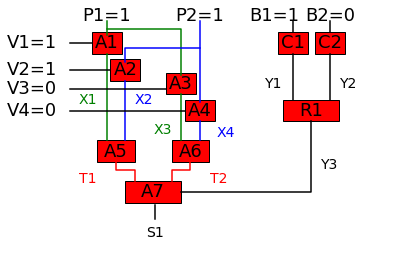

Checking to see if we can find a model, we have determined the presence of conflicts is... False


In [22]:
s = Spaceship()
s.change_input("P1", True)
s.change_input("P2", True)
s.change_input("V1", True)
s.change_input("V2", True)
s.change_input("V3", False)
s.change_input("V4", False)
s.change_input("B1", True)
s.change_input("B2", False)
s.all_unknown()

# Current observation
obs = "~S1"

s.update_colors()
s.plot_spaceship()
print("Input the components to check for conflict, separated by commas")
a = input()
cmps = parse_input(a, s)
clear_output()
for c in cmps:
    s.change_component(c, True)

s.plot_spaceship()
conflict = s.check_conflicts(obs)
print("Checking to see if we can find a model, we have determined the presence of conflicts is... %s"%conflict)

### Code Snippet 4: Kernel Diagnoses

When we have many conflicts, a natural question to ask is what are the smallest number of failures that can explain all conflicts.  Can all be explained by one component failure? A simultaneous failure of two components? More? With as we generate more and more conflicts, we would also like to compactly represent the minimum failures for all previous conflicts.  To do this, we use kernel diagnoses. A kernel diagnosis is the smallest a partial mode assignment to the system, where any full mode assignment that contains the kernel diagnosis removes all known conflicts. In other words, our kernel diagnoses are the minimum set of failures that could explain all conflicts observed to date.

The process of generating these kernel diagnoses are shown below. 

In [23]:
def update_kernel_diagnoses(kernel_diagnoses, conflict, printing = False):  # list[set[tuple]], set[tuple]
    new_kernel_diagnoses = []
    if printing:
        print("Incorporating the conflict:")
        print_conf(conflict)
        
    if len(kernel_diagnoses) == 0:  # If we have no current kernel diagnosis, then the conflict becomes the kernel diagnosis
        if printing: print("with no previous conflicts.")
        for e in conflict:
            new_kernel_diagnoses.append(set([(e[0],0)]))
    else:
        if printing:
            print("with previous kernel diagnosis ")
            print_diag(kernel_diagnoses)
        for k in kernel_diagnoses:  # For each kernel diagnosis that we have
            for c in conflict:      # And for each component in the conflict
                k_new = copy(k)
                k_new.add((c[0], 0))  # Create the diagnosis that is the combination of the two
                if k_new not in new_kernel_diagnoses: #And if we haven't already
                    new_kernel_diagnoses.append(k_new) #Add it to our list of new kernel diagnoses
        if printing:
            print("Combining the two gives all new possible diagnoses")
            print_diag(new_kernel_diagnoses)
            print("Remove all from this list that are supersets of others to give")
        for i in range(len(new_kernel_diagnoses)):  # Iterate through that list
            nk = new_kernel_diagnoses.pop(0)  # Pull off the first diagnosis
            for ok in copy(new_kernel_diagnoses):  # Check it against all other diagnosis
                if nk.issubset(ok):                # And if the other diagnosis are a subset of it
                    new_kernel_diagnoses.remove(ok)  # Remove them from the list
            new_kernel_diagnoses.append(nk)          # Then add the one we pulled off back on so it can be checked against others
    if printing:
        print("New kernel diagnosis")
        print_diag(new_kernel_diagnoses)
    return new_kernel_diagnoses

To demonstrate this algorithm working, let's assume we have a conflict A1 = 1, A2 = 1, X1 = 1

In [24]:
conflict = set([('A1',1),('A2',1),('X1',1)])
kd = update_kernel_diagnoses([], conflict, True)

Incorporating the conflict:
Conflict: A2 = 1, X1 = 1, A1 = 1
with no previous conflicts.
New kernel diagnosis
A2 = 0, 
X1 = 0, 
A1 = 0, 


In that case, out kernel diagnosis is any component involved in the conflict. Now let's add a new conflict A1 = 1, A3 = 1, X1 = 1, X2 = 1.  

In [25]:
conflict = set([('A1',1),('A3',1),('X1',1),('X2',1)])
kd = update_kernel_diagnoses(kd, conflict, True)


Incorporating the conflict:
Conflict: X2 = 1, X1 = 1, A1 = 1, A3 = 1
with previous kernel diagnosis 
A2 = 0, 
X1 = 0, 
A1 = 0, 
Combining the two gives all new possible diagnoses
X2 = 0, A2 = 0, 
X1 = 0, A2 = 0, 
A1 = 0, A2 = 0, 
A3 = 0, A2 = 0, 
X1 = 0, X2 = 0, 
X1 = 0, 
X1 = 0, A1 = 0, 
X1 = 0, A3 = 0, 
X2 = 0, A1 = 0, 
A1 = 0, 
A1 = 0, A3 = 0, 
Remove all from this list that are supersets of others to give
New kernel diagnosis
A1 = 0, 
X2 = 0, A2 = 0, 
A3 = 0, A2 = 0, 
X1 = 0, 


We can see that this shows those conflicts could be explained by two single faults, or two double faults. 

Let's look at this on our spaceship example! We begin with a working spaceship, and an empty kernel diagnosis.

In [26]:
s = Spaceship()
s.all_working()
kernel_diagnoses = []

We set the inputs to a case where we would expect to get thrust, however we don't see any.

In [27]:
s.change_input("P1", True)
s.change_input("P2", True)
s.change_input("V1", True)
s.change_input("V2", True)
s.change_input("V3", False)
s.change_input("V4", False)
s.change_input("B1", True)
s.change_input("B2", False)

obs = "~S1"

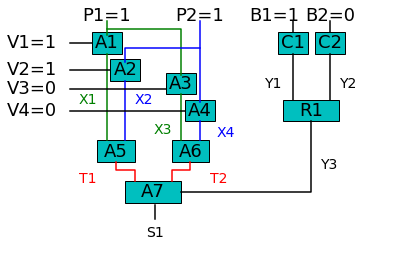

Conflict detected
New kernel diagnosis:
A3 = 0, 
A7 = 0, 
C2 = 0, 
A6 = 0, 
C1 = 0, 
A2 = 0, 
A1 = 0, 
R1 = 0, 
A4 = 0, 
A5 = 0, 


In [28]:
s.plot_spaceship()
if s.check_conflicts(obs):
    print("Conflict detected")
    conflict = convert_to_set(s)
kernel_diagnoses = update_kernel_diagnoses(kernel_diagnoses, conflict)
print("New kernel diagnosis:")
print_diag(kernel_diagnoses)

This is saying that every component in the system could be broken. That's true, but not very useful.  Consider the case below, which is a more reasonable possible conflict A1,A2,A3,A7,C1,R1. From this we can see that there are six possible components that, in failing, would explain both conflicts.

Conflict detected


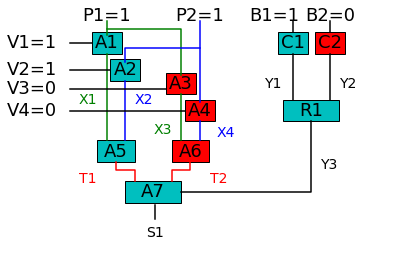

Current kernel diagnoses:
A1 = 0, 
R1 = 0, 
A5 = 0, 
A7 = 0, 
C1 = 0, 
A2 = 0, 


In [29]:
s.all_unknown()
s.update_colors()
a = "A1,A2,A5,A7,C1,R1"
cmps = parse_input(a, s)
for c in cmps:
    s.change_component(c, True)
if s.check_conflicts(obs):
    print("Conflict detected")
    conflict = convert_to_set(s)
kernel_diagnoses = update_kernel_diagnoses(kernel_diagnoses, conflict)
s.plot_spaceship()
print("Current kernel diagnoses:")
print_diag(kernel_diagnoses)

To narrow down this list further, we can change some of the system states. Let's suppose we switch over to our secondary thruster, but still don't observe any thrust.

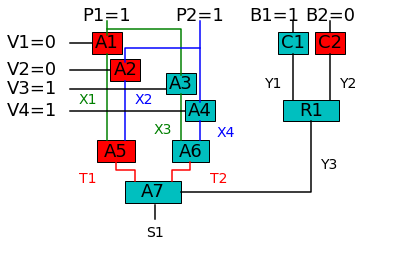

Conflict detected
Current kernel diagnoses
A7 = 0, 
C1 = 0, 
A3 = 0, A2 = 0, 
A2 = 0, A6 = 0, 
A2 = 0, A4 = 0, 
A1 = 0, A3 = 0, 
A1 = 0, A6 = 0, 
A1 = 0, A4 = 0, 
R1 = 0, 
A5 = 0, A3 = 0, 
A5 = 0, A6 = 0, 
A5 = 0, A4 = 0, 


In [30]:
s.change_input("P1", True)
s.change_input("P2", True)
s.change_input("V1", False)
s.change_input("V2", False)
s.change_input("V3", True)
s.change_input("V4", True)
s.change_input("B1", True)
s.change_input("B2", False)
s.all_unknown()
obs = "~S1"
s.update_colors()
a = "A3,A4,A6,A7,C1,R1"
cmps = parse_input(a, s)
for c in cmps:
    s.change_component(c, True)
clear_output()
s.plot_spaceship()
if s.check_conflicts(obs):
    print("Conflict detected")
    conflict = convert_to_set(s)
kernel_diagnoses = update_kernel_diagnoses(kernel_diagnoses, conflict)
print("Current kernel diagnoses")
print_diag(kernel_diagnoses)

We can see that we get a larger number of kernel diagnoses, but all are not equally likely.  There are only three that are single failures - C1, R1, and A7.  There are then a larger number of dual failures in the propulsion system.  This intuitively suggests that in this case a sensor failure or battery failure is more likely - clearly probability plays an important role!


If we assume a set of known failure probabilities for the components, we can rank the kernel diagnoses from most to least likely. One possible set is shown below. In this case, P(G) is read from the list and P(U) is 1-P(G). 

$P(X) = \prod_{X_i\in X}P(X_i)$

In [31]:
ship_component_reliability = {"A1":.9, "A2":.9, "A3":.9, "A4":.9, 
                              "A5":.7, "A6":.7, 
                              "A7":.99, 
                              "R1":.95, "C1":.9, "C2":.8}

In [32]:
P_list = []
for kd in kernel_diagnoses:
    failed_comp = [d[0] for d in kd]
    
    P = 1.
    for comp in ship_component_reliability:
        if comp in failed_comp:
            P *= (1.-ship_component_reliability[comp])
        else:
            P *= (ship_component_reliability[comp])
    P_list.append((P, kd))

for i in sorted(P_list, key = lambda y: y[0], reverse=True):
    fc = [d[0] for d in i[1]]
    print("Probability %s failed: %4.4f"%(",".join(fc), i[0]))

Probability A5,A6 failed: 0.0400
Probability C1 failed: 0.0242
Probability R1 failed: 0.0115
Probability A2,A6 failed: 0.0104
Probability A1,A6 failed: 0.0104
Probability A5,A3 failed: 0.0104
Probability A5,A4 failed: 0.0104
Probability A2,A4 failed: 0.0027
Probability A1,A4 failed: 0.0027
Probability A3,A2 failed: 0.0027
Probability A1,A3 failed: 0.0027
Probability A7 failed: 0.0022


We can see that, in the case where our engines are fairly unreliable (A3 and A7 only have a 70% chance of working), it's actually more likely that both of them failed than for there to have been a problem in the power supply.  

This method can be extended to include more than just the Good and Unknown states.  With information about the probabilities of specific failure modes, you could use the methods above to check the consistency of the system and make more informed estimates.

Try running the code below for different inputs, observations, and conflicts, and watch how the kernel diagnoses change as more information is provided. 

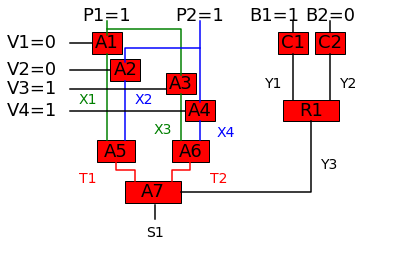

Current kernel diagnoses
C1 = 0, 
A3 = 0, A2 = 0, 
A2 = 0, A6 = 0, 
A2 = 0, A4 = 0, 
A1 = 0, A3 = 0, 
A1 = 0, A6 = 0, 
A1 = 0, A4 = 0, 
R1 = 0, 
A5 = 0, A3 = 0, 
A5 = 0, A6 = 0, 
A5 = 0, A4 = 0, 
A7 = 0, 


In [33]:
s.change_input("P1", True)
s.change_input("P2", True)
s.change_input("V1", False)
s.change_input("V2", False)
s.change_input("V3", True)
s.change_input("V4", True)
s.change_input("B1", True)
s.change_input("B2", False)
s.all_unknown()
obs = "~S1"
s.plot_spaceship()
s.update_colors()
a = input()
cmps = parse_input(a, s)
for c in cmps:
    s.change_component(c, True)
clear_output()
s.plot_spaceship()
if s.check_conflicts(obs):
    print("Conflict detected")
    conflict = convert_to_set(s)
kernel_diagnoses = update_kernel_diagnoses(kernel_diagnoses, conflict)
print("Current kernel diagnoses")
print_diag(kernel_diagnoses)

### Code Snippet 5: Probabilistic Mode Estimation

Probabilistic Mode Estimation or Mode Identification utilizing probabilistic inference's goal is to determine the most likely state of the components in the system. From our large set of kernel diagnoses, we want to pick the most likely failures.  

Let's say you got a fancy new boolean logic AND gate. Unfortunately, when you apply two True voltages to the inputs, the output is **zero**! What a scam you say, the component is totally bunk! 

Similarly, you bought your very own resistor network as found in lecture, and one of the outputs is wrong! Any of it or the components that lead to it could be *bogus*, you pontificate!


In general, the insights you form as diagnoses from symptoms improve the process of Mode Identification (finding resolutions).

In [34]:
print("You might remember this network from the lecture slides!")

ands = "(A1 ==> ((A & C) <=> X)) & (A2 ==> ((B & D) <=> Y)) & (A3 ==> ((C & E) <=> Z))"
xors = "(X1 ==> (((X & ~Y) | (~X & Y)) <=> F)) & (X2 ==> (((Y & ~Z) | (~Y & Z)) <=> G))"
inputs = "A & B & C & ~D & E"
outputs = "~F & G" #~F is our identified symptom!
components = "A1 & A2 & A3 & X1 & X2"
# Todo: due to a bug in the cnf routine, we have to cnf a few times...
formula = AND.from_string_to_cnf(str(to_cnf(to_cnf("&".join([ands, xors, inputs, outputs, components])))))

print("Even this formula is very complicated: " + str(formula))
solution = DPLL(formula).solve()
print("But notice what it says about a solution when all the components are asserted good. There's: " + str(solution))

You might remember this network from the lecture slides!
Even this formula is very complicated: ( ( A | ~X | ~A1 ) & ( C | ~X | ~A1 ) & ( X | ~A | ~C | ~A1 ) & ( B | ~Y | ~A2 ) & ( D | ~Y | ~A2 ) & ( Y | ~B | ~D | ~A2 ) & ( C | ~Z | ~A3 ) & ( E | ~Z | ~A3 ) & ( Z | ~C | ~E | ~A3 ) & ( ~X | X | ~F | ~X1 ) & ( Y | X | ~F | ~X1 ) & ( ~X | ~Y | ~F | ~X1 ) & ( Y | ~Y | ~F | ~X1 ) & ( ~X | Y | F | ~X1 ) & ( X | ~Y | F | ~X1 ) & ( ~Y | Y | ~G | ~X2 ) & ( Z | Y | ~G | ~X2 ) & ( ~Y | ~Z | ~G | ~X2 ) & ( Z | ~Z | ~G | ~X2 ) & ( ~Y | Z | G | ~X2 ) & ( Y | ~Z | G | ~X2 ) & ( A ) & ( B ) & ( C ) & ( ~D ) & ( E ) & ( ~F ) & ( G ) & ( A1 ) & ( A2 ) & ( A3 ) & ( X1 ) & ( X2 ) )
But notice what it says about a solution when all the components are asserted good. There's: None


Given the following components and failures, we'd like to be able to walk through the possible resolutions in probability order.

In [35]:
class_kernel_diagnoses = [[('A2', 0), ('A3', 0)], [('A2', 0), ('X2', 0)], [('A1', 0)], [('X1', 0)]]
class_possible_faults = {"A1": .99, "A2": .9, "A3": .99, "X1": .8, "X2": .8} # (Name, Probability it *works*)
class_components_order: [(str, float)] = list(class_possible_faults.items())

In [36]:
# Inputs: possible_faults: prior probabilities of component failures
#         kernel_diagnoses: minimal combinations of conflicting components that explain the conflicts
#                           CAN be updated during the iteration process  
#         components_order: the order to traverse the variables, (components, probability) tuples
# Procedure: Perform constraint-based A*
# Returns: A Generator for constraint-based A*, each iteration it performs a little more work to get the next 
#          possible resolution.
def constraint_a_star(possible_faults: dict, kernel_diagnoses: set, components_order: [(str, float)]) -> Iterable:
    max_queue: [(float, AStarNode)] = []
    tree = AStarNode(None, None, None, parent=None)
    tree.construct_tree(components_order)
    max_queue.append((0, tree))

    # Every conflict must be represented by one of the components marked failed in this resolution.
    # Kernel diagnostics encapsulates what it means to represent each conflict.
    # So to avoid an A* trim, we must be able to contain all the elements of at least one kernel diagnostic.
    def satisfies_a_kernel(tree):
        # make sure that the marked-failed *union* the not-yet assigned contain at least one kernel diagnostic
        assignments = tree.assignments
        assigned_variables = set([assignment[0] for assignment in assignments])
        unassigned_variables = set(possible_faults.keys()).difference(assigned_variables)
        faulty_variables = set([assignment[0] for assignment in assignments if assignment[1] is False])
        kernel_friendly_variables = unassigned_variables.union(faulty_variables)

        for kernel in kernel_diagnoses:
            if kernel_friendly_variables.issuperset(set([component[0] for component in kernel])):
                return True
        return False

    while len(max_queue) > 0:
        max_index = max(range(len(max_queue)), key=lambda i: max_queue[i][0])
        max_tree: AStarNode = max_queue.pop(max_index)[1]

        if max_tree.is_trimmed:
            continue
        elif not satisfies_a_kernel(max_tree):
            max_tree.set_trimmed(True)
            continue
        elif len(max_tree.children) == 0:  # and satisfies a kernel
            yield max_tree
            continue

        left_child = max_tree.children[0]
        right_child = max_tree.children[1]

        max_queue.append((left_child.total_cost, left_child))
        max_queue.append((right_child.total_cost, right_child))

In [37]:
i = 10
for tree_node in constraint_a_star(class_possible_faults, class_kernel_diagnoses, class_components_order):
    i = i -1
    if i is 0: break
    print(str(tree_node.resolution) + ". Probability: " + str(tree_node.total_cost))

[('A1', 1), ('A2', 1), ('A3', 1), ('X1', 0), ('X2', 1)]. Probability: 0.14113439999999997
[('A1', 1), ('A2', 1), ('A3', 1), ('X1', 0), ('X2', 0)]. Probability: 0.035283599999999984
[('A1', 1), ('A2', 0), ('A3', 1), ('X1', 1), ('X2', 0)]. Probability: 0.015681599999999993
[('A1', 1), ('A2', 0), ('A3', 1), ('X1', 0), ('X2', 1)]. Probability: 0.015681599999999993
[('A1', 0), ('A2', 1), ('A3', 1), ('X1', 1), ('X2', 1)]. Probability: 0.005702400000000006
[('A1', 1), ('A2', 0), ('A3', 1), ('X1', 0), ('X2', 0)]. Probability: 0.0039203999999999975
[('A1', 0), ('A2', 1), ('A3', 1), ('X1', 1), ('X2', 0)]. Probability: 0.001425600000000001
[('A1', 1), ('A2', 1), ('A3', 0), ('X1', 0), ('X2', 1)]. Probability: 0.001425600000000001
[('A1', 0), ('A2', 1), ('A3', 1), ('X1', 0), ('X2', 1)]. Probability: 0.001425600000000001


Wow, it's a lot to print all of these-- but above you can see *the first 10* of the possible resolutions. The **cool** thing about the `constraint_a_star` code is that it is something called a _generator_, it only searches the tree as much as you need it to. `:-)`

The resolution with only **X1** failing is far more likely than the others! Hopefully it will satisfy the constraints!

In [38]:
tree_node = next(constraint_a_star(class_possible_faults, class_kernel_diagnoses, class_components_order))
components = tree_node.assignments_string
formula = AND.from_string_to_cnf(str(to_cnf(to_cnf("&".join([ands, xors, inputs, outputs, components])))))
formula = DPLL(formula).solve()
print("But does it satisfy?: " + str(formula.is_satisfied))
print("It's a hairball, but at now we have satisfaction!!: " + str(formula))

But does it satisfy?: True
It's a hairball, but at now we have satisfaction!!: ( ( A = True | ~X = False | ~A1 = False ) & ( C = True | ~X = False | ~A1 = False ) & ( X = True | ~A = False | ~C = False | ~A1 = False ) & ( B = True | ~Y = True | ~A2 = False ) & ( D = False | ~Y = True | ~A2 = False ) & ( Y = False | ~B = False | ~D = True | ~A2 = False ) & ( C = True | ~Z = False | ~A3 = False ) & ( E = True | ~Z = False | ~A3 = False ) & ( Z = True | ~C = False | ~E = False | ~A3 = False ) & ( ~X = False | X = True | ~F = True | ~X1 = True ) & ( Y = False | X = True | ~F = True | ~X1 = True ) & ( ~X = False | ~Y = True | ~F = True | ~X1 = True ) & ( Y = False | ~Y = True | ~F = True | ~X1 = True ) & ( ~X = False | Y = False | F = False | ~X1 = True ) & ( X = True | ~Y = True | F = False | ~X1 = True ) & ( ~Y = True | Y = False | ~G = False | ~X2 = False ) & ( Z = True | Y = False | ~G = False | ~X2 = False ) & ( ~Y = True | ~Z = False | ~G = False | ~X2 = False ) & ( Z = True | ~Z = Fa

In conflict directed search, you would start by taking the first resolution, checking it, then updating the kernel diagnoses and getting the next most probable resolution. That's what we'll show you now!

### Conflict-Directed Search

Goal is to find a resolution that is a model for the symptomatic behavior you're finding. We'll show you an example using the **BOOLEAN SPACESHIP**†. Here's how it all ties together for conflict directed A*

1. Unit propagation is used to propagate truths
2. DPLL finds models where they exist
3. Conflict checking lets you decide on diagnoses
4. Kernel diagnoses combine the diagnoses to optimize mode estimation
5. Mode estimation used kernel diagnoses to trim the search space and yielded the most probable resolution
6. Conflict-directed Search determines you have the correct resolution by updating kernel diagnoses where necessary

In [39]:
ship_formula = AND.from_string_to_cnf(str(to_cnf(to_cnf("&".join(Spaceship().create_system())))))

You'll need a system of telling you where you have conflicts, something that knows your inputs and expected outputs, and takes your component configurations to perform the tests.

In [54]:
# Input: Configuration of components in standard form e.g. [(A1, 0),...]
# Output: A set of lists of conflicts related to each symptom
def blackbox_check_conflicts_spaceship(configuration: [(str, int)]) -> {tuple((str, int))}:
        s = Spaceship()
        s.all_off()  
        s.change_input("P1", True)
        s.change_input("P2", True)
        s.change_input("V3", True)
        s.change_input("V4", True)
        s.change_input("B1", True)
        s.change_input("B2", False)
        repeat = True
        while repeat:
            s.plot_spaceship()
            print("Enter observation (e.g. S1, ~T1): ")
            obs = input()

            print("Enter inputs to flip, separated by commas (e.g. P1,P2,V1):")
            inp = input()
            n_inp = parse_input(inp,s)
            try:
                for i in n_inp:
                    cs = s.inputs[i]._assignment
                    s.change_input(i, not cs)
            except:
                pass
            clear_output()
            print("Observation: %s"%obs)
            s.plot_spaceship()
            s.all_unknown()

            print("Enter components to check for conflict, separated by commas (e.g. A1,A2,A3):")
            a = input()
            cmps = parse_input(a, s)
            try:
                for c in cmps:
                    s.change_component(c, True)
            except:
                pass
            clear_output()
            s.plot_spaceship()
            try:
                has_conflict = s.check_conflicts(obs)
            except:
                has_conflict = False
            if has_conflict:
                print("Conflict detected in above highlighted states")
                conflict = convert_to_set(s)
                return conflict
            else:
                print("No conflict observed; repeat? (y/n)")
                rpt = input()
                if "n" in rpt:
                    repeat = False
                    return set([])

In [55]:
# Yields a set of component configurations that is a model for the blackbox's reported symptoms
# Inputs:
#        blackbox_function: the black box checker,
#        formula: your system formula
#        probabilities: the probabilities of each component failure (a-priori)
# Output: the component configurations that pass the black box test! In standard form...
def conflict_directed_a_star(blackbox_function, formula, probabilities) -> [(str, int)]:
    kernel_diagnoses = list()
    class_components_order = list(probabilities.items())
    for tree_node in constraint_a_star(class_possible_faults, class_kernel_diagnoses, class_components_order):
        conflicts = blackbox_function(tree_node.resolution)
        if len(conflicts) == 0:
            print("Yarr space pirates be darned... We found a model!")
            return tree_node.resolution
        else:
            new_diagnoses = update_kernel_diagnoses(kernel_diagnoses, conflicts)
            kernel_diagnoses.clear()
            kernel_diagnoses.extend(new_diagnoses)
            print("Rats, conflicts... we've updated the kernel!")
            print("Here's what's in the kernel: " + ", ".join(["\n"+str(el) for el in kernel_diagnoses]))

    print("If we got here, we couldn't satisfy the black_box... Some people are just impossible to please!")
    return None

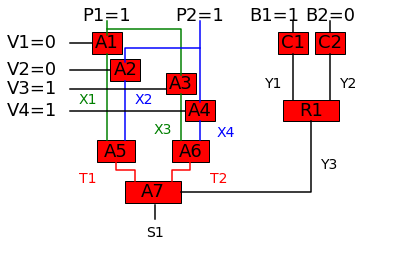

No conflict observed; repeat? (y/n)
n
Yarr space pirates be darned... We found a model!
Nice!!! Here's the valid model!: [('A1', 1), ('A2', 1), ('A3', 1), ('A4', 1), ('A5', 0), ('A6', 1), ('A7', 1), ('R1', 1), ('C1', 1), ('C2', 1)]
We figured out what's wrong! Now we can just use DPLL to see if we have a backup system to get us going!
Stay tuned next week, when the boolean space voyagers use DPLL and fire their thrusters...


In [56]:
print("Let's fire up the thrusters!")
print("There's a problem with the thrusters (Obviously)! We gotta figure out what's wrong.")
configuration = conflict_directed_a_star(blackbox_check_conflicts_spaceship, ship_formula, ship_component_reliability)
print("Nice!!! Here's the valid model!: " + str(configuration))
print("We figured out what's wrong! Now we can just use DPLL to see if we have a backup system to get us going!")
print("Stay tuned next week, when the boolean space voyagers use DPLL and fire their thrusters...")

### Note
The code will repeatedly execute until terminated by the user

## That's all, folks!

Now you've seen how Unit Propagation through Conflict-directed search help you identify the mode of your system and hence let you determine alternate means of sending your boolean spaceship across the universe!

†: n.b. **boolean spaceship slogan**: _"To 0, and beyond!"_